In [ ]:
from google.colab import drive
drive.mount('/content/drive')

100%|██████████| 4000/4000 [11:55<00:00,  5.59it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


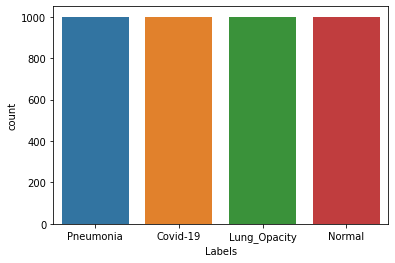

Covid-19: 1000
Normal: 1000
Pneumonia:  1000
Lung_Opacity:  1000


<Figure size 432x288 with 0 Axes>

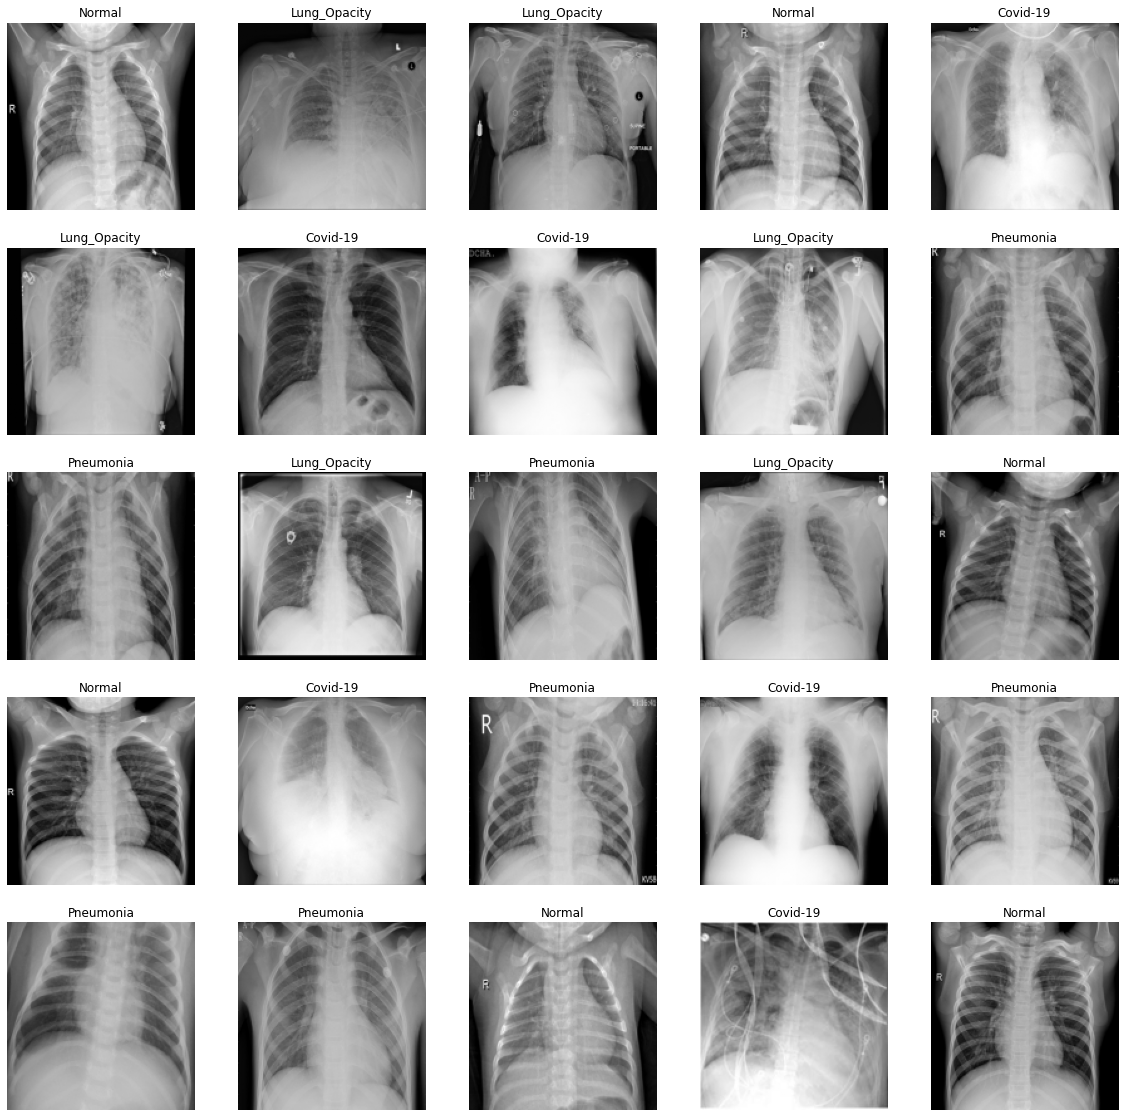

['Covid-19' 'Lung_Opacity' 'Normal' 'Pneumonia']
[0. 0. 0. 1.]
(3200, 150, 150, 3)
(800, 150, 150, 3)
(3200, 4)
(800, 4)
last layer output shape: (None, 7, 7, 768)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Test Loss is 0.6868272423744202
Test Accuracy is 0.26374998688697815
Viral Pneumonia
Train classification report on train data section
              precision    recall  f1-score   support

    Covid-19    0.24541   0.13375   0.17314       800
Lung_Opacity    0.41962   0.25125   0.31431       800
      Normal    0.23835   0.49875   0.32255       800
   Pneumonia    0.36007   0.27500   0.31184       800

    accuracy                        0.28969      3200
   macro avg    0.31586   0.28969   0.28046      3200
weighted avg    0.31586   0.28969   0.28046      3200

Test classification report on test data section
              precision    recall  f1-score   support

    Covid-19    0.20408   0.10000   0.13423       200
Lung_Opacity    0.33628   0.19000   0.24281       200
      Normal    0.22005   0.45000   0.29557       200
   Pneumonia    0.35000   0.31500   0.33158       200

    accuracy                        0.26375       800
   macro avg    0.27760   0.26375   0.25105       800
we

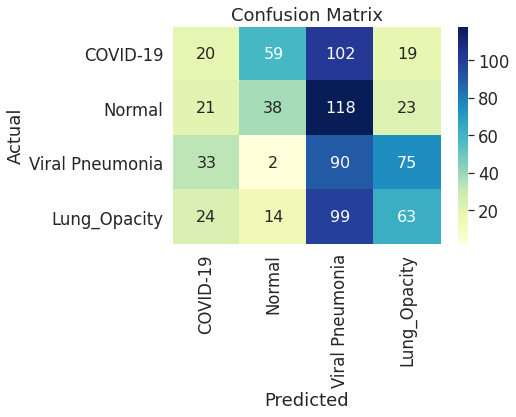

##### Plot the training loss and accuracy #####


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
80/80 [==============================] - 187s 2s/step - loss: 0.2381 - acc: 0.8144 - val_loss: 0.1376 - val_acc: 0.8963
Epoch 2/10
80/80 [==============================] - 181s 2s/step - loss: 0.1375 - acc: 0.8972 - val_loss: 0.1885 - val_acc: 0.8450
Epoch 3/10
80/80 [==============================] - 181s 2s/step - loss: 0.1164 - acc: 0.9106 - val_loss: 0.1583 - val_acc: 0.8687
Epoch 4/10
80/80 [==============================] - 185s 2s/step - loss: 0.0883 - acc: 0.9331 - val_loss: 0.1245 - val_acc: 0.9038
Epoch 5/10
80/80 [==============================] - 183s 2s/step - loss: 0.0813 - acc: 0.9369 - val_loss: 0.1221 - val_acc: 0.9100
Epoch 6/10
80/80 [==============================] - 184s 2s/step - loss: 0.0640 - acc: 0.9522 - val_loss: 0.1703 - val_acc: 0.8950
Epoch 7/10
80/80 [==============================] - 184s 2s/step - loss: 0.0554 - acc: 0.9606 - val_loss: 0.1036 - val_acc: 0.9300
Epoch 8/10
80/80 [==============================] - 185s 2s/step - loss: 0.0523 - a

<Figure size 432x288 with 0 Axes>

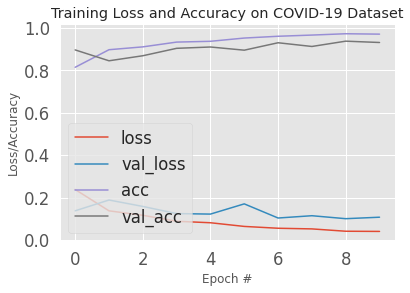

<Figure size 432x288 with 0 Axes>

In [4]:
# -*- coding: utf-8 -*-
"""classification-of-covid-19-using-cnn.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Rh1PQmp3fvMAuhML_k2HUQ2qq21nSg-E
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: 
# https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) 
# will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames
          #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) 
# that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, 
# but they won't be saved outside of the current session

"""# import Libraries"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm

from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

"""# ****Explorer****"""
'''
os.listdir('/kaggle/input')

os.listdir('/kaggle/input/covid19-radiography-database')

os.listdir('/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database')
'''
#os.listdir('D:/Image Procesing code model data/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset')
#os.listdir('D:/COVID19-MODEL/COVID-19_Radiography_Dataset')
os.listdir('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset')
#D:/DOWNLOAD/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset
# Image paths

imagePaths = []
#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset'):    
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

# Data - Label

Data = []
Target = []
resize = 150
#cat = {'Viral Pneumonia': 'Pneumonia', 'NORMAL': 'Normal', 'COVID-19': 'Covid-19'}
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}

for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])

# Count by Label

df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
plt.show()
plt.savefig("ClassAmount.png")

print('Covid-19:',Target.count('Covid-19'))
print('Normal:',Target.count('Normal'))
print('Pneumonia: ',Target.count('Pneumonia'))
print('Lung_Opacity: ',Target.count('Lung_Opacity'))


# Images shape

size = []
for file in imagePaths: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

# Show Images

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')     
plt.show()
plt.savefig("Image_list.png")

"""# Prepare Data"""

# encode labels as integers

le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[0])

# split Data

(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.20,
                                                      stratify=labels,random_state=42)

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

trainX[0]
######## End of data preparation #############



import os

from tensorflow.keras import layers
from tensorflow.keras import Model


from tensorflow.keras.applications.inception_v3 import InceptionV3

#local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
local_weights_file = '/content/drive/MyDrive/DATA/IMAGE/4. Inception W-Loaded/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False


last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(4, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])
'''
model.add(Dense(4, activation = "softmax"))
model.compile(optimizer = keras.optimizers.Adam(),
              loss= keras.losses.categorical_crossentropy,
              metrics= ['accuracy'])
'''


#  RESULT ANALYSIS SECTION

modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

# classification report on train
batch_size=40
epochs=10
print("Train classification report on train data section")
predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# classification report on test

print("Test classification report on test data section")
predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()
plt.savefig("Confusion Matrix plot.png")

#model.save('CNN_Covid19_Xray_V1.h5')


'''Visualization'''
# plot the training loss and accuracy
print("##### Plot the training loss and accuracy #####")
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=batch_size),
    steps_per_epoch=len(trainX) // batch_size,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch_size,
    epochs=epochs)

#N = EPOCHS
N=epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig("Acc Loss plot.png")



100%|██████████| 4000/4000 [00:28<00:00, 139.49it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


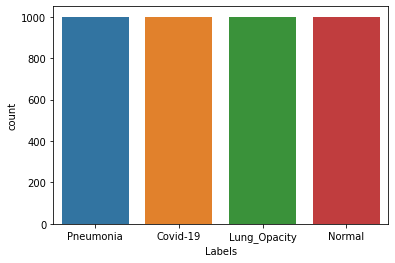

Covid-19: 1000
Normal: 1000
Pneumonia:  1000
Lung_Opacity:  1000


<Figure size 432x288 with 0 Axes>

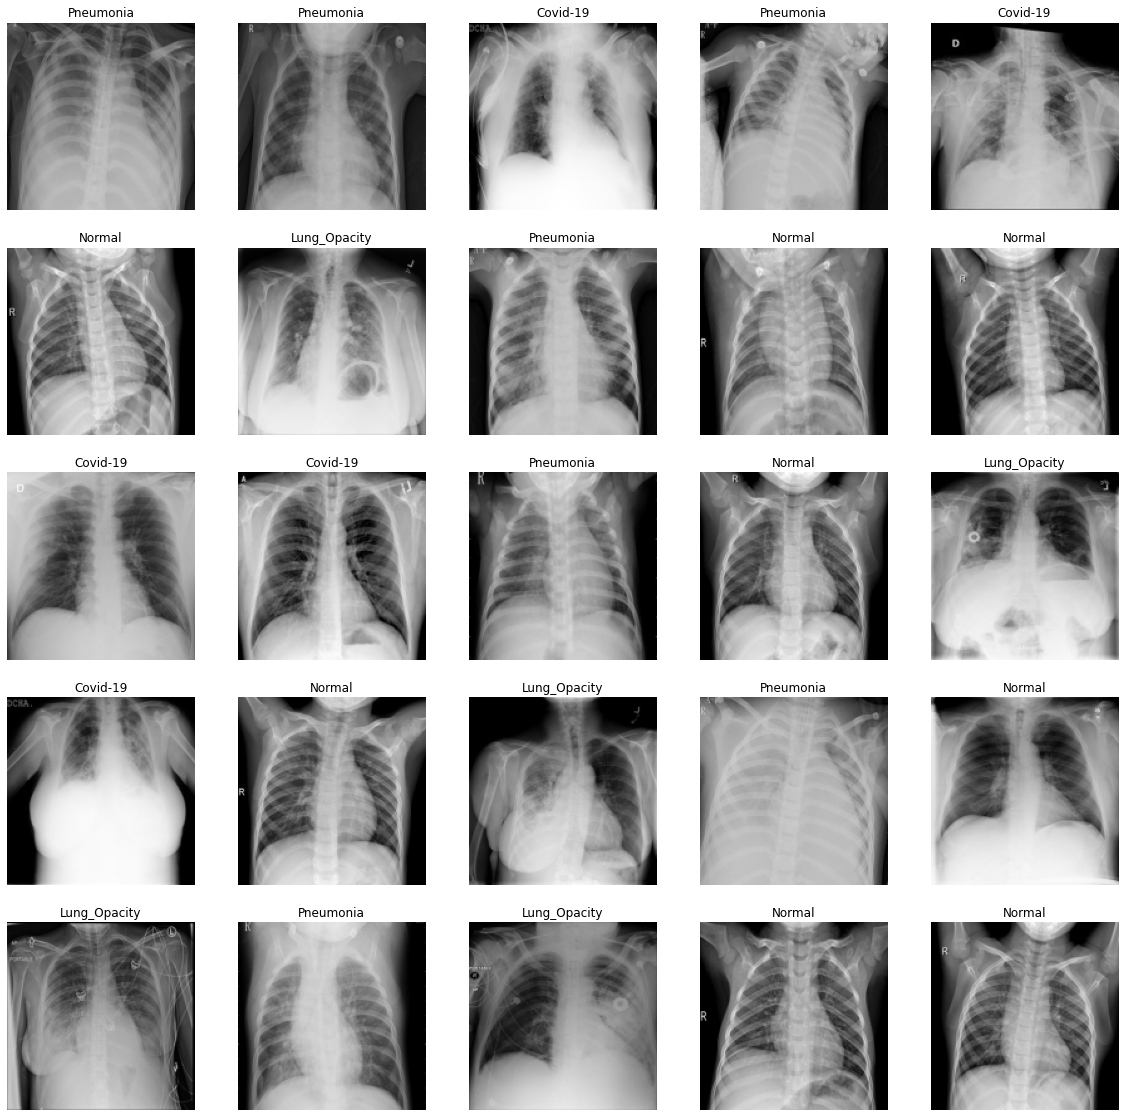

['Covid-19' 'Lung_Opacity' 'Normal' 'Pneumonia']
[0. 0. 0. 1.]
(3200, 150, 150, 3)
(800, 150, 150, 3)
(3200, 4)
(800, 4)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 128)       0         
_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Covid-19    0.24882   0.99000   0.39769       800
Lung_Opacity    0.00000   0.00000   0.00000       800
      Normal    0.00000   0.00000   0.00000       800
   Pneumonia    0.17647   0.00375   0.00734       800

    accuracy                        0.24844      3200
   macro avg    0.10632   0.24844   0.10126      3200
weighted avg    0.10632   0.24844   0.10126      3200

              precision    recall  f1-score   support

    Covid-19    0.24812   0.99000   0.39679       200
Lung_Opacity    0.00000   0.00000   0.00000       200
      Normal    0.00000   0.00000   0.00000       200
   Pneumonia    0.00000   0.00000   0.00000       200

    accuracy                        0.24750       800
   macro avg    0.06203   0.24750   0.09920       800
weighted avg    0.06203   0.24750   0.09920       800



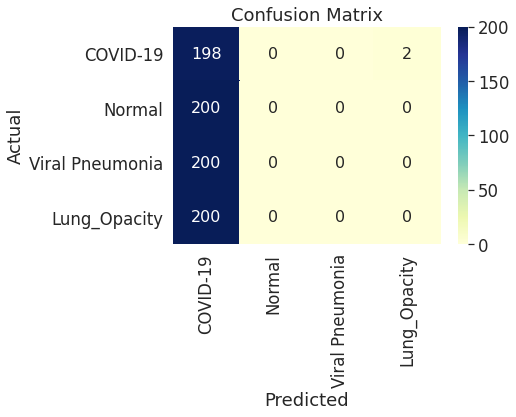

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
80/80 [==============================] - 158s 2s/step - loss: 1.4642 - accuracy: 0.6075 - val_loss: 0.4757 - val_accuracy: 0.8213
Epoch 2/10
80/80 [==============================] - 159s 2s/step - loss: 0.5629 - accuracy: 0.7781 - val_loss: 0.4347 - val_accuracy: 0.8238
Epoch 3/10
80/80 [==============================] - 157s 2s/step - loss: 0.4868 - accuracy: 0.8172 - val_loss: 0.3688 - val_accuracy: 0.8712
Epoch 4/10
80/80 [==============================] - 157s 2s/step - loss: 0.5019 - accuracy: 0.8053 - val_loss: 0.4449 - val_accuracy: 0.8300
Epoch 5/10
80/80 [==============================] - 157s 2s/step - loss: 0.4441 - accuracy: 0.8338 - val_loss: 0.3728 - val_accuracy: 0.8637
Epoch 6/10
80/80 [==============================] - 157s 2s/step - loss: 0.4011 - accuracy: 0.8497 - val_loss: 0.3493 - val_accuracy: 0.8725
Epoch 7/10
80/80 [==============================] - 156s 2s/step - loss: 0.4228 - accuracy: 0.8409 - val_loss: 0.3291 - val_accuracy: 0.8763
Epoch 8/10
80

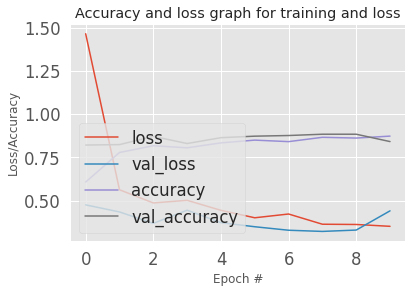

"\nfig, ax = plt.subplots(1, 2, figsize=(22, 8))\nax = ax.ravel()\n\nprint('Ploting graph of Accuracy and loss is here:')\n#for i, met in enumerate(['accuracy', 'loss']):\nfor i, met in enumerate(['acc', 'loss']):\n    ax[i].plot(history.history[met])\n    #ax[i].plot(history.history['val_' + met])\n    ax[i].set_title('Model {}'.format(met))\n    ax[i].set_xlabel('epochs')\n    ax[i].set_ylabel(met)\n    #ax[i].legend(['train', 'val'])\n    ax[i].legend(['train'])\n"